In [1]:
import numpy as np
import math
import random
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.options.mode.chained_assignment = None 

In [25]:
#fig= plt.figure(figsize=(10,6), dpi=300)
font = {'family' : 'times new roman',
       'weight' : 'bold',
       'size'   : 16}
plt.rc('font', **font)

In [45]:
df_c1 = pd.read_csv("Cluster1_RE.csv")

In [46]:
df_c1['idmeter'].nunique()

750

In [47]:
df_c1.head()

,dates,idmeter,r_entr_d2d,r_entr_d2d_morn,r_entr_d2d_daytime,r_entr_d2d_pre-peak,r_entr_d2d_peak,r_entr_d2d_post-peak,r_entr_d2mean,r_entr_d2mean_morn,r_entr_d2mean_daytime,r_entr_d2mean_pre-peak,r_entr_d2mean_peak,r_entr_d2mean_post-peak,dailymean,totalcons
0,01-12-2019,22815596,0.027084,-0.013023,0.008982,-0.032777,0.027729,0.041895,0.025994,0.023651,-0.030453,0.003094,-0.000591,-0.006609,21.00566,12126.795
1,02-12-2019,22815596,0.023563,-0.012971,0.018347,0.044512,0.002429,-0.013509,0.028488,0.002324,-0.026969,-0.032920,0.024586,0.032787,21.00566,12126.795
2,03-12-2019,22815596,0.022536,0.022775,0.021585,-0.011242,-0.015204,-0.010070,0.011703,-0.013076,-0.018397,-0.002829,0.024874,0.015103,21.00566,12126.795
3,04-12-2019,22815596,0.045811,-0.019599,-0.009150,0.014759,0.107239,-0.008175,0.013419,0.004587,-0.000648,-0.020108,0.007388,0.003752,21.00566,12126.795
4,05-12-2019,22815596,0.012849,0.021465,0.003100,-0.000208,-0.032557,0.003142,0.023708,-0.016569,-0.009884,-0.010752,0.092185,-0.005378,21.00566,12126.795


In [48]:
df_c1.iloc[:,2:14] = df_c1.iloc[:,2:14].abs()

In [49]:
meter = df_c1['idmeter'].unique()
df_c1_RE = pd.DataFrame(columns = ['idmeter', 'r_entr_d2d_median', 'r_entr_d2d_morn_median', 'r_entr_d2d_daytime_median',
                                   'r_entr_d2d_pre-peak_median', 'r_entr_d2d_peak_median', 'r_entr_d2d_post-peak_median', 
                                   'r_entr_d2mean_median', 'r_entr_d2mean_morn_median', 'r_entr_d2mean_daytime_median',
                                   'r_entr_d2mean_pre-peak_median', 'r_entr_d2mean_peak_median', 'r_entr_d2mean_post-peak_median',
                                   'daily_mean', 'total_cons'])
for i in meter:
    df_c_m = df_c1.loc[df_c1['idmeter'] == i]
    m = df_c_m.loc[df_c_m['r_entr_d2d'] != np.inf, 'r_entr_d2d'].max()
    df_c_m['r_entr_d2d'].replace(np.inf, m, inplace=True)
    
    m = df_c_m.loc[df_c_m['r_entr_d2d_morn'] != np.inf, 'r_entr_d2d_morn'].max()
    df_c_m['r_entr_d2d_morn'].replace(np.inf, m, inplace=True)
    
    m = df_c_m.loc[df_c_m['r_entr_d2d_daytime'] != np.inf, 'r_entr_d2d_daytime'].max()
    df_c_m['r_entr_d2d_daytime'].replace(np.inf, m, inplace=True)
    
    m = df_c_m.loc[df_c_m['r_entr_d2d_pre-peak'] != np.inf, 'r_entr_d2d_pre-peak'].max()
    df_c_m['r_entr_d2d_pre-peak'].replace(np.inf, m, inplace=True)
    
    m = df_c_m.loc[df_c_m['r_entr_d2d_peak'] != np.inf, 'r_entr_d2d_peak'].max()
    df_c_m['r_entr_d2d_peak'].replace(np.inf, m, inplace=True)
    
    m = df_c_m.loc[df_c_m['r_entr_d2d_post-peak'] != np.inf, 'r_entr_d2d_post-peak'].max()
    df_c_m['r_entr_d2d_post-peak'].replace(np.inf, m, inplace=True)
    
    m = df_c_m.loc[df_c_m['r_entr_d2mean'] != np.inf, 'r_entr_d2mean'].max()
    df_c_m['r_entr_d2mean'].replace(np.inf, m, inplace=True)
    
    m = df_c_m.loc[df_c_m['r_entr_d2mean_morn'] != np.inf, 'r_entr_d2mean_morn'].max()
    df_c_m['r_entr_d2mean_morn'].replace(np.inf, m, inplace=True)
    
    m = df_c_m.loc[df_c_m['r_entr_d2mean_daytime'] != np.inf, 'r_entr_d2mean_daytime'].max()
    df_c_m['r_entr_d2mean_daytime'].replace(np.inf, m, inplace=True)
    
    m = df_c_m.loc[df_c_m['r_entr_d2mean_pre-peak'] != np.inf, 'r_entr_d2mean_pre-peak'].max()
    df_c_m['r_entr_d2mean_pre-peak'].replace(np.inf, m, inplace=True)
    
    m = df_c_m.loc[df_c_m['r_entr_d2mean_peak'] != np.inf, 'r_entr_d2mean_peak'].max()
    df_c_m['r_entr_d2mean_peak'].replace(np.inf, m, inplace=True)
    
    m = df_c_m.loc[df_c_m['r_entr_d2mean_post-peak'] != np.inf, 'r_entr_d2mean_post-peak'].max()
    df_c_m['r_entr_d2mean_post-peak'].replace(np.inf, m, inplace=True)
    
    median_d2d = df_c_m['r_entr_d2d'].median()
    median_d2d_morn = df_c_m['r_entr_d2d_morn'].median()
    median_d2d_daytime = df_c_m['r_entr_d2d_daytime'].median()
    median_d2d_pre_peak = df_c_m['r_entr_d2d_pre-peak'].median()
    median_d2d_peak = df_c_m['r_entr_d2d_peak'].median()
    median_d2d_post_peak = df_c_m['r_entr_d2d_post-peak'].median()
    median_d2mean = df_c_m['r_entr_d2mean'].median()
    median_d2mean_morn = df_c_m['r_entr_d2mean_morn'].median()
    median_d2mean_daytime = df_c_m['r_entr_d2mean_daytime'].median()
    median_d2mean_pre_peak = df_c_m['r_entr_d2mean_pre-peak'].median()
    median_d2mean_peak = df_c_m['r_entr_d2mean_peak'].median()
    median_d2mean_post_peak = df_c_m['r_entr_d2mean_post-peak'].median()
    median_dailymean = df_c_m['dailymean'].median()
    median_totalcons = df_c_m['totalcons'].median()
    df_c1_RE = df_c1_RE.append({'idmeter': i, 'r_entr_d2d_median': median_d2d, 'r_entr_d2d_morn_median': median_d2d_morn,
                                'r_entr_d2d_daytime_median': median_d2d_daytime, 'r_entr_d2d_pre-peak_median' : median_d2d_pre_peak, 
                                'r_entr_d2d_peak_median': median_d2d_peak, 'r_entr_d2d_post-peak_median': median_d2d_post_peak, 
                                'r_entr_d2mean_median': median_d2mean, 'r_entr_d2mean_morn_median': median_d2mean_morn, 
                                'r_entr_d2mean_daytime_median': median_d2mean_daytime, 'r_entr_d2mean_pre-peak_median': median_d2mean_pre_peak,
                                'r_entr_d2mean_peak_median': median_d2mean_peak, 'r_entr_d2mean_post-peak_median': median_d2mean_post_peak,
                                'daily_mean': median_dailymean, 'total_cons': median_totalcons}, ignore_index = True)
df_c1_RE.to_csv("Cluster1_RE_Median.csv", index=False)

In [50]:
df_c1_RE.head()

,idmeter,r_entr_d2d_median,r_entr_d2d_morn_median,r_entr_d2d_daytime_median,r_entr_d2d_pre-peak_median,r_entr_d2d_peak_median,r_entr_d2d_post-peak_median,r_entr_d2mean_median,r_entr_d2mean_morn_median,r_entr_d2mean_daytime_median,r_entr_d2mean_pre-peak_median,r_entr_d2mean_peak_median,r_entr_d2mean_post-peak_median,daily_mean,total_cons
0,22815596.0,0.085506,0.018017,0.017224,0.017049,0.029173,0.010638,0.066236,0.041868,0.031871,0.016336,0.024751,0.022335,21.005660,12126.7950
1,22815401.0,0.011736,0.010455,0.008872,0.008924,0.012949,0.006556,0.013942,0.010848,0.015037,0.010745,0.015783,0.010877,20.536840,11622.8320
2,22815986.0,0.002203,0.004671,0.005434,0.004386,0.007528,0.004219,0.002822,0.004055,0.005535,0.009785,0.008269,0.008818,20.004409,7821.7240
3,22816059.0,0.228105,0.050848,0.027037,0.024826,0.040179,0.020993,0.155533,0.036849,0.026374,0.019352,0.034982,0.039918,19.248178,7506.7895
4,22814863.0,0.018017,0.010909,0.009578,0.010543,0.017091,0.007892,0.023112,0.010904,0.014757,0.010789,0.024160,0.017601,18.753180,7332.4935


In [51]:
df_c1_RE['daily_mean_normalize']=(df_c1_RE['daily_mean']-df_c1_RE['daily_mean'].min())/(df_c1_RE['daily_mean'].max()-df_c1_RE['daily_mean'].min())

In [52]:
df_c1_RE.head()

,idmeter,r_entr_d2d_median,r_entr_d2d_morn_median,r_entr_d2d_daytime_median,r_entr_d2d_pre-peak_median,r_entr_d2d_peak_median,r_entr_d2d_post-peak_median,r_entr_d2mean_median,r_entr_d2mean_morn_median,r_entr_d2mean_daytime_median,r_entr_d2mean_pre-peak_median,r_entr_d2mean_peak_median,r_entr_d2mean_post-peak_median,daily_mean,total_cons,daily_mean_normalize
0,22815596.0,0.085506,0.018017,0.017224,0.017049,0.029173,0.010638,0.066236,0.041868,0.031871,0.016336,0.024751,0.022335,21.005660,12126.7950,1.000000
1,22815401.0,0.011736,0.010455,0.008872,0.008924,0.012949,0.006556,0.013942,0.010848,0.015037,0.010745,0.015783,0.010877,20.536840,11622.8320,0.977619
2,22815986.0,0.002203,0.004671,0.005434,0.004386,0.007528,0.004219,0.002822,0.004055,0.005535,0.009785,0.008269,0.008818,20.004409,7821.7240,0.952202
3,22816059.0,0.228105,0.050848,0.027037,0.024826,0.040179,0.020993,0.155533,0.036849,0.026374,0.019352,0.034982,0.039918,19.248178,7506.7895,0.916101
4,22814863.0,0.018017,0.010909,0.009578,0.010543,0.017091,0.007892,0.023112,0.010904,0.014757,0.010789,0.024160,0.017601,18.753180,7332.4935,0.892470


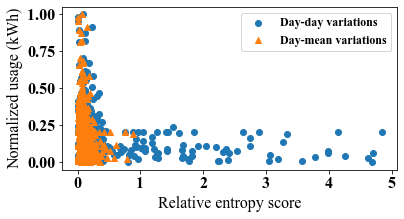

In [53]:
p1 = plt.scatter(df_c1_RE['r_entr_d2d_median'], df_c1_RE['daily_mean_normalize'])
p2 = plt.scatter(df_c1_RE['r_entr_d2mean_median'], df_c1_RE['daily_mean_normalize'], marker ="^")
#plt.rcParams.update({'font.size': 18})
plt.legend((p1, p2), ("Day-day variations", "Day-mean variations"), scatterpoints=1, loc='upper right',
           ncol=1, fontsize=12, fancybox=True)
plt.rcParams['figure.figsize'] = [6, 3]
plt.xlabel('Relative entropy score')
plt.ylabel('Normalized usage (kWh)')
#plt.yticks(np.arange(0, 1.1, 0.5))
plt.savefig(f"Plots/Cluster 1_daytoday_mean_plot.pdf", dpi=300, bbox_inches='tight')
plt.show()

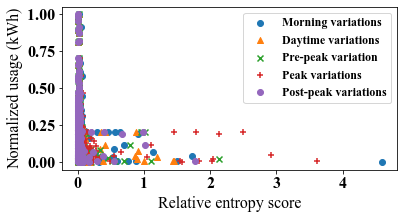

In [54]:
p1 = plt.scatter(df_c1_RE['r_entr_d2d_morn_median'], df_c1_RE['daily_mean_normalize'])
p2 = plt.scatter(df_c1_RE['r_entr_d2d_daytime_median'], df_c1_RE['daily_mean_normalize'], marker ="^")
p3 = plt.scatter(df_c1_RE['r_entr_d2d_pre-peak_median'], df_c1_RE['daily_mean_normalize'], marker ="x")
p4 = plt.scatter(df_c1_RE['r_entr_d2d_peak_median'], df_c1_RE['daily_mean_normalize'], marker ="+")
p5 = plt.scatter(df_c1_RE['r_entr_d2d_post-peak_median'], df_c1_RE['daily_mean_normalize'], marker ="o")
#plt.rcParams.update({'font.size': 18})
plt.legend((p1, p2, p3, p4, p5), 
           ("Morning variations", "Daytime variations", "Pre-peak variation", "Peak variations", "Post-peak variations"),
           scatterpoints=1, loc='upper right', ncol=1, fontsize=12, fancybox=True)
plt.rcParams['figure.figsize'] = [6, 3]
plt.xlabel('Relative entropy score')
plt.ylabel('Normalized usage (kWh)')
#plt.yticks(np.arange(0, 1.1, 0.5))
plt.savefig(f"Plots/Cluster 1_daytoday_all_plot.pdf", dpi=300, bbox_inches='tight')
plt.show()

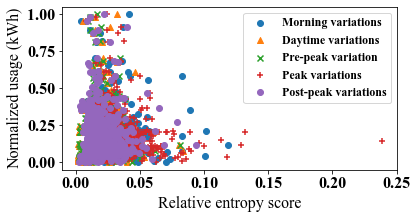

In [57]:
p1 = plt.scatter(df_c1_RE['r_entr_d2mean_morn_median'], df_c1_RE['daily_mean_normalize'])
p2 = plt.scatter(df_c1_RE['r_entr_d2mean_daytime_median'], df_c1_RE['daily_mean_normalize'], marker ="^")
p3 = plt.scatter(df_c1_RE['r_entr_d2mean_pre-peak_median'], df_c1_RE['daily_mean_normalize'], marker ="x")
p4 = plt.scatter(df_c1_RE['r_entr_d2mean_peak_median'], df_c1_RE['daily_mean_normalize'], marker ="+")
p5 = plt.scatter(df_c1_RE['r_entr_d2mean_post-peak_median'], df_c1_RE['daily_mean_normalize'], marker ="o")
#plt.rcParams.update({'font.size': 18})
plt.legend((p1, p2, p3, p4, p5), 
           ("Morning variations", "Daytime variations", "Pre-peak variation", "Peak variations", "Post-peak variations"),
           scatterpoints=1, loc='upper right', ncol=1, fontsize=12, fancybox=True)
plt.rcParams['figure.figsize'] = [6, 3]
plt.xlabel('Relative entropy score')
plt.ylabel('Normalized usage (kWh)')
#plt.xticks(np.arange(0, 1.1, 0.5))
plt.savefig(f"Plots/Cluster 1_daytomean_all_plot.pdf", dpi=300, bbox_inches='tight')
plt.show()

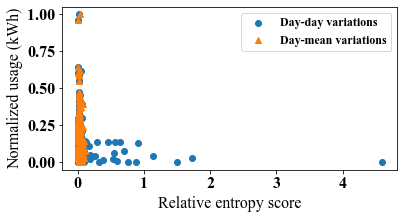

In [15]:
p1 = plt.scatter(df_c1_RE['r_entr_d2d_morn_median'], df_c1_RE['daily_mean_normalize'])
p2 = plt.scatter(df_c1_RE['r_entr_d2mean_morn_median'], df_c1_RE['daily_mean_normalize'], marker ="^")
#plt.rcParams.update({'font.size': 18})
plt.legend((p1, p2), ("Day-day variations", "Day-mean variations"), scatterpoints=1, loc='upper right',
           ncol=1, fontsize=12, fancybox=True)
plt.rcParams['figure.figsize'] = [6, 3]
plt.xlabel('Relative entropy score')
plt.ylabel('Normalized usage (kWh)')
#plt.yticks(np.arange(0, 1.1, 0.5))
#plt.savefig(f"Cluster 1_day_mean_morn_plot.pdf", dpi=300, bbox_inches='tight')
plt.show()

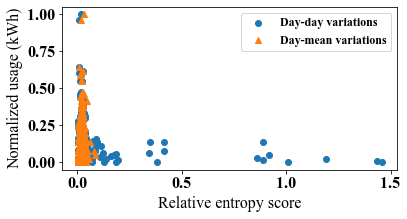

In [17]:
p1 = plt.scatter(df_c1_RE['r_entr_d2d_daytime_median'], df_c1_RE['daily_mean_normalize'])
p2 = plt.scatter(df_c1_RE['r_entr_d2mean_daytime_median'], df_c1_RE['daily_mean_normalize'], marker ="^")
#plt.rcParams.update({'font.size': 18})
plt.legend((p1, p2), ("Day-day variations", "Day-mean variations"), scatterpoints=1, loc='upper right',
           ncol=1, fontsize=12, fancybox=True)
plt.rcParams['figure.figsize'] = [6, 3]
plt.xlabel('Relative entropy score')
plt.ylabel('Normalized usage (kWh)')
#plt.yticks(np.arange(0, 1.1, 0.5))
#plt.savefig(f"Plots/Cluster 1_day_mean_daytime_plot.pdf", dpi=300, bbox_inches='tight')
plt.show()

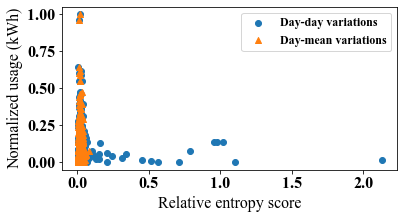

In [18]:
p1 = plt.scatter(df_c1_RE['r_entr_d2d_pre-peak_median'], df_c1_RE['daily_mean_normalize'])
p2 = plt.scatter(df_c1_RE['r_entr_d2mean_pre-peak_median'], df_c1_RE['daily_mean_normalize'], marker ="^")
#plt.rcParams.update({'font.size': 18})
plt.legend((p1, p2), ("Day-day variations", "Day-mean variations"), scatterpoints=1, loc='upper right',
           ncol=1, fontsize=12, fancybox=True)
plt.rcParams['figure.figsize'] = [6, 3]
plt.xlabel('Relative entropy score')
plt.ylabel('Normalized usage (kWh)')
#plt.yticks(np.arange(0, 1.1, 0.5))
#plt.savefig(f"Plots/Cluster 1_day_mean_pre-peak_plot.pdf", dpi=300, bbox_inches='tight')
plt.show()

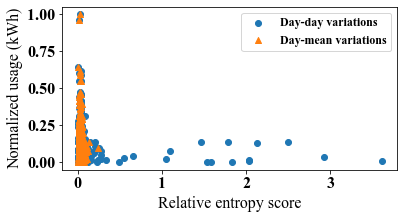

In [19]:
p1 = plt.scatter(df_c1_RE['r_entr_d2d_peak_median'], df_c1_RE['daily_mean_normalize'])
p2 = plt.scatter(df_c1_RE['r_entr_d2mean_peak_median'], df_c1_RE['daily_mean_normalize'], marker ="^")
#plt.rcParams.update({'font.size': 18})
plt.legend((p1, p2), ("Day-day variations", "Day-mean variations"), scatterpoints=1, loc='upper right',
           ncol=1, fontsize=12, fancybox=True)
plt.rcParams['figure.figsize'] = [6, 3]
plt.xlabel('Relative entropy score')
plt.ylabel('Normalized usage (kWh)')
#plt.yticks(np.arange(0, 1.1, 0.5))
#plt.savefig(f"Plots/Cluster 1_day_mean_peak_plot.pdf", dpi=300, bbox_inches='tight')
plt.show()

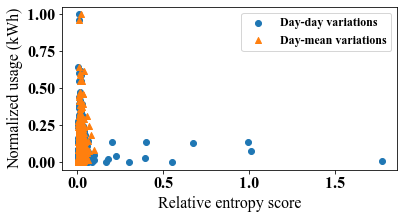

In [20]:
p1 = plt.scatter(df_c1_RE['r_entr_d2d_post-peak_median'], df_c1_RE['daily_mean_normalize'])
p2 = plt.scatter(df_c1_RE['r_entr_d2mean_post-peak_median'], df_c1_RE['daily_mean_normalize'], marker ="^")
#plt.rcParams.update({'font.size': 18})
plt.legend((p1, p2), ("Day-day variations", "Day-mean variations"), scatterpoints=1, loc='upper right',
           ncol=1, fontsize=12, fancybox=True)
plt.rcParams['figure.figsize'] = [6, 3]
plt.xlabel('Relative entropy score')
plt.ylabel('Normalized usage (kWh)')
#plt.yticks(np.arange(0, 1.1, 0.5))
#plt.savefig(f"Plots/Cluster 1_day_mean_post-peak_plot.pdf", dpi=300, bbox_inches='tight')
plt.show()

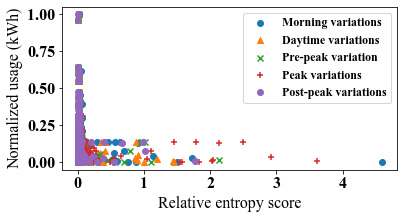

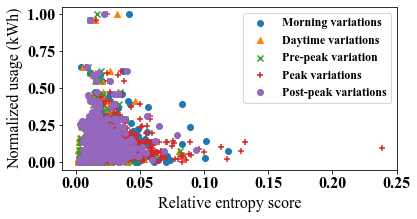

In [22]:
p1 = plt.scatter(df_c1_RE['r_entr_d2mean_morn_median'], df_c1_RE['daily_mean_normalize'])
p2 = plt.scatter(df_c1_RE['r_entr_d2mean_daytime_median'], df_c1_RE['daily_mean_normalize'], marker ="^")
p3 = plt.scatter(df_c1_RE['r_entr_d2mean_pre-peak_median'], df_c1_RE['daily_mean_normalize'], marker ="x")
p4 = plt.scatter(df_c1_RE['r_entr_d2mean_peak_median'], df_c1_RE['daily_mean_normalize'], marker ="+")
p5 = plt.scatter(df_c1_RE['r_entr_d2mean_post-peak_median'], df_c1_RE['daily_mean_normalize'], marker ="o")
#plt.rcParams.update({'font.size': 18})
plt.legend((p1, p2, p3, p4, p5), 
           ("Morning variations", "Daytime variations", "Pre-peak variation", "Peak variations", "Post-peak variations"),
           scatterpoints=1, loc='upper right', ncol=1, fontsize=12, fancybox=True)
plt.rcParams['figure.figsize'] = [6, 3]
plt.xlabel('Relative entropy score')
plt.ylabel('Normalized usage (kWh)')
#plt.yticks(np.arange(0, 1.1, 0.5))
plt.savefig(f"Plots/Cluster 1_daytomean_all_plot.pdf", dpi=300, bbox_inches='tight')
plt.show()